In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d tarundalal/dangerous-insects-dataset

 97% 435M/447M [00:05<00:00, 59.3MB/s]
100% 447M/447M [00:05<00:00, 83.2MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/dangerous-insects-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
insects_folder=os.listdir('/content/farm_insects')
print(insects_folder)
print(len(insects_folder))

['Fruit Flies', 'Cabbage Loopers', 'Western Corn Rootworms', 'Colorado Potato Beetles', 'Brown Marmorated Stink Bugs', 'Corn Borers', 'Spider Mites', 'Thrips', 'Tomato Hornworms', 'Aphids', 'Fall Armyworms', 'Africanized Honey Bees (Killer Bees)', 'Citrus Canker', 'Corn Earworms', 'Armyworms']
15


In [8]:
data=[]

In [ ]:
for i in range(15):
  folder_path='/content/farm_insects/'+insects_folder[i]
  img_folder=os.listdir(folder_path)
  l=len(img_folder)
  for j in range(l):
    img_path=folder_path+'/'+img_folder[j]
    img_pillow=Image.open(img_path)
    img_color=img_pillow.convert('RGB')
    img_resize=img_color.resize((64,64))
    img_arr=np.array(img_resize)
    data.append([img_arr,i])

In [10]:
len(data)

1591

In [11]:
x=[]
y=[]
for i,j in data:
  x.append(i)
  y.append(j)

In [12]:
x=np.array(x)
y=np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

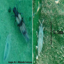

In [14]:
cv2_imshow(x_train[0])

In [15]:
y_train[0]

7

In [18]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
num_of_classes=15
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='softmax'))

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.1)

41/41 [==============================] - 7s 173ms/step - loss: 0.2214 - accuracy: 0.9215 - val_loss: 3.2248 - val_accuracy: 0.3611
Epoch 92/100
41/41 [==============================] - 6s 155ms/step - loss: 0.2353 - accuracy: 0.9176 - val_loss: 3.1197 - val_accuracy: 0.3681
Epoch 93/100
41/41 [==============================] - 7s 161ms/step - loss: 0.2429 - accuracy: 0.9114 - val_loss: 3.0456 - val_accuracy: 0.3889
Epoch 94/100
41/41 [==============================] - 7s 161ms/step - loss: 0.2222 - accuracy: 0.9223 - val_loss: 3.2959 - val_accuracy: 0.3542
Epoch 95/100
41/41 [==============================] - 6s 155ms/step - loss: 0.2117 - accuracy: 0.9215 - val_loss: 3.6950 - val_accuracy: 0.3681
Epoch 96/100
41/41 [==============================] - 7s 171ms/step - loss: 0.2410 - accuracy: 0.9223 - val_loss: 3.1003 - val_accuracy: 0.3819
Epoch 97/100
41/41 [==============================] - 6s 146ms/step - loss: 0.2285 - accuracy: 0.9293 - val_loss: 3.3412 - val_accuracy: 0.3542
Epoch

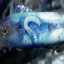

1/1 [==============================] - 0s 23ms/step
The insect is Western Corn Rootworms


In [30]:
img_path='/content/farm_insects/Western Corn Rootworms/Image_1.jpg'
img_pillow=Image.open(img_path)
img_color=img_pillow.convert('RGB')
img_resize=img_color.resize((64,64))
img_arr=np.array(img_resize)
cv2_imshow(img_arr)
img_scaled=img_arr/255
img_reshape=np.reshape(img_scaled,[1,64,64,3])
prediction=model.predict(img_reshape)
output=np.argmax(prediction)
if(output==0):
  print('The insect is Fruit Flies')
elif(output==1):
  print('The insect is Cabbage Loopers')
elif(output==2):
  print('The insect is Western Corn Rootworms')
elif(output==3):
  print('The insect is Colorado Potato Beetles')
elif(output==4):
  print('The insect is Brown Marmorated Stink Bugs')
elif(output==5):
  print('The insect is Corn Borers')
elif(output==6):
  print('The insect is Spider Mites')
elif(output==7):
  print('The insect is Thrips')
elif(output==8):
  print('The insect is Tomato Hornworms')
elif(output==9):
  print('The insect is Aphids')
elif(output==10):
  print('The insect is Fall Armyworms')
elif(output==11):
  print('The insect is Africanized Honey Bees (Killer Bees)')
elif(output==12):
  print('The insect is Citrus Canker')
elif(output==13):
  print('The insect is Corn Earworms')
elif(output==14):
  print('The insect is Armyworms')